In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv('sales_data_1.csv')

In [6]:
df1_cpy = df1.copy()

In [8]:
df1_cpy.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


## 1. what is the overall gross margin for their business?

In [10]:
df1_cpy['Gross Margin'] = (df1_cpy['Selling price'] - df1_cpy['Buying price']) * df1_cpy['Quantity sold']

In [11]:
df1_cpy.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Gross Margin
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,856.68
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,146.71
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,297.45
3,21/08/23,Vendor7,52.01,Customer3,64.53,7,87.64
4,21/08/23,Vendor2,98.91,Customer5,140.92,1,42.01


In [14]:
overall_gross_margin = df1_cpy['Gross Margin'].sum()

In [15]:
print(f"The overall gross margin for the business is: {overall_gross_margin}")

The overall gross margin for the business is: 31482.749999999996


## 2. Which vendor is the most profitable?

In [16]:
df1_cpy['Profit'] = (df1_cpy['Selling price'] - df1_cpy['Buying price']) * df1_cpy['Quantity sold']

In [17]:
df1_cpy.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Gross Margin,Profit
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,856.68,856.68
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,146.71,146.71
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,297.45,297.45
3,21/08/23,Vendor7,52.01,Customer3,64.53,7,87.64,87.64
4,21/08/23,Vendor2,98.91,Customer5,140.92,1,42.01,42.01


In [20]:
most_profitable_vendor_index = df1_cpy['Profit'].idxmax()

In [35]:
most_profitable_vendor = df1_cpy.loc[most_profitable_vendor_index]

In [36]:
most_profitable_vendor

Date                 21/08/23
Firm bought from      Vendor3
Buying price            98.11
Customer            Customer2
Selling price          146.76
Quantity sold              62
Gross Margin           3016.3
Profit                 3016.3
Name: 7, dtype: object

In [34]:
print(f"The most profitable vendor is: {most_profitable_vendor['Firm bought from']}")

The most profitable vendor is: Vendor3


## 3. which customer is the least profitable?

In [30]:
customer_profit = df1_cpy.groupby('Customer')['Profit'].sum()

In [31]:
least_profitable_customer = customer_profit.idxmin()

In [75]:
print(f"The least profitable customer is: {least_profitable_customer}")

The least profitable customer is: Customer3


## 4. Which day of the week was most profitable for them

In [78]:
df1_cpy['Day_of_Week'] = df1_cpy['Date'].dt.day_name()

In [81]:
df1_cpy.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Gross Margin,Profit,Day_of_Week
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,856.68,856.68,Monday
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,146.71,146.71,Monday
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,297.45,297.45,Monday
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,87.64,87.64,Monday
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,42.01,42.01,Monday


In [82]:
grouped_df = df1_cpy.groupby('Day_of_Week')['Profit'].sum()


In [84]:
most_profitable_day = grouped_df.idxmax()


In [86]:
print(f"The most profitable day of the week was: {most_profitable_day}")

The most profitable day of the week was: Monday


## 5. Which day of the week was the least profitable for them?

In [74]:
pivot_table = pd.pivot_table(df1_cpy, values='Profit', index=df1_cpy['Date'].dt.day_name(),  aggfunc='sum', fill_value=0)

In [66]:
pivot_table

,Profit
Date,
Friday,3761.94
Monday,6847.34
Saturday,5223.16
Sunday,3086.46
Thursday,4866.03
Tuesday,3305.35
Wednesday,4392.47


In [67]:
least_profitable_day = pivot_table.idxmin()

In [68]:
least_profitable_day

Profit    Sunday
dtype: object

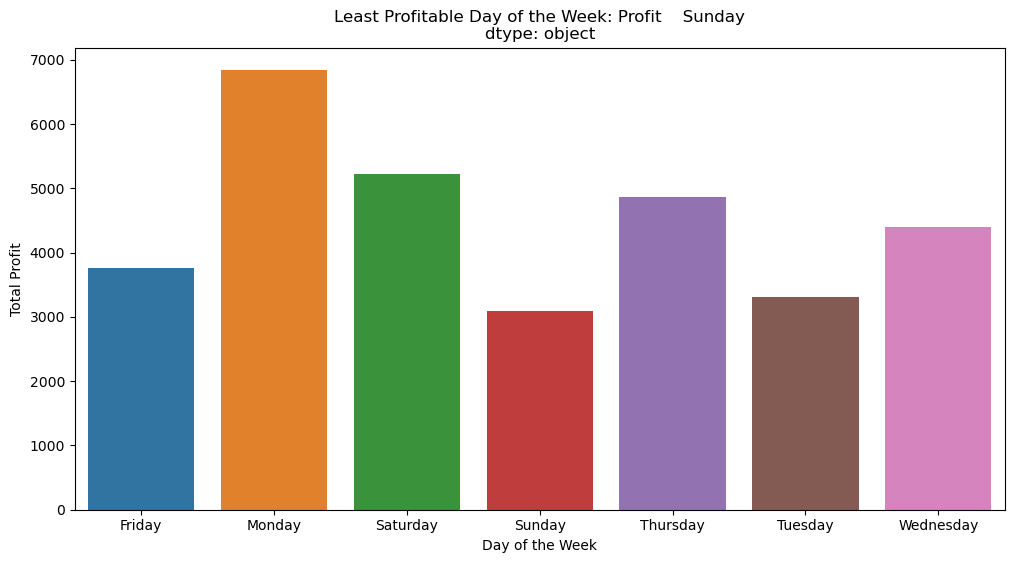

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_table.index, y=pivot_table['Profit'])
plt.title(f'Least Profitable Day of the Week: {least_profitable_day}')
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.show()

In [72]:
print(f"The least profitable day of the week is: {least_profitable_day}")

The least profitable day of the week is: Profit    Sunday
dtype: object


In [87]:
df2 = pd.read_csv('sales_data_2.csv')

In [88]:
df2_cpy = df2.copy()

In [89]:
df2_cpy.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


## 6. Calculate a 3-day average of the daily gross profit

In [90]:
df2_date_sorted = df2_cpy.sort_values('Date')

In [91]:
df2_date_sorted.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [96]:
df2_date_sorted['Daily Gross Profit'] = (df2_date_sorted['Selling price'] * df2_date_sorted['Quantity sold']) - (df2_date_sorted['Buying price'] * df2_date_sorted['Quantity bought'])

In [93]:
df2_date_sorted['3-day Average Gross Profit'] = df2_date_sorted['Daily Gross Profit'].rolling(window=3).mean()

In [98]:
df2_date_sorted.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Daily Gross Profit,3-day Average Gross Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,-297.08,NaN
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,-5484.29,NaN
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,213.52,-1855.950000
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,-2772.91,-2681.226667
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01,-839.126667


In [99]:
print(df2_date_sorted[['Date', '3-day Average Gross Profit']].head(10))

         Date  3-day Average Gross Profit
0  2023-08-21                         NaN
1  2023-08-21                         NaN
2  2023-08-21                -1855.950000
3  2023-08-21                -2681.226667
4  2023-08-21                 -839.126667
5  2023-08-21                 -434.123333
6  2023-08-21                  530.580000
7  2023-08-21                 1522.010000
8  2023-08-21                  561.936667
9  2023-08-21                  156.063333


## 7. provide insights into how this 3-day trend changes over the time period covered in the dataset

In [108]:
df2_date_sorted['Date'] = pd.to_datetime(df2_date_sorted['Date'], errors='coerce')

In [109]:
df_day = df2_date_sorted.set_index('Date').resample('D').last()

In [110]:
df2_date_sorted['3-day Average Gross Profit'].fillna(0, inplace=True)

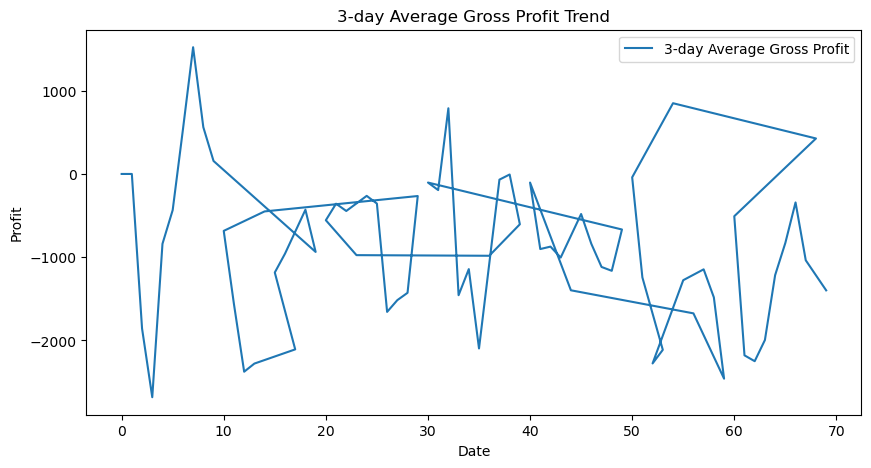

In [111]:
plt.figure(figsize=(10,5))
plt.plot(df2_date_sorted.index, df2_date_sorted['3-day Average Gross Profit'], label='3-day Average Gross Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('3-day Average Gross Profit Trend')
plt.legend()
plt.show()

## 8. Can you optimize the sales process to ensure gross margin is maximized?

    8.1 Would you fire any vendors?
    8.2 Would you let go of any customers?